In [1]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import requests
import json
from pprint import pprint
import random
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
from matplotlib.path import Path
from matplotlib.patches import PathPatch
# import matplotlib.patches as patches

# from config import api_key

In [2]:
# Import file to df

# Store filepath in a variable
pitch_datapath = "Resources/pitch_data.csv"

# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
pitch_data_df = pd.read_csv(pitch_datapath, encoding="ISO-8859-1")

# Show just the header
pitch_data_df.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
0,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-170,-47,L,R,FA,91.0
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
2,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,41,152,L,R,FA,90.0
3,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-88,143,L,R,FA,94.0
4,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Ball,-200,-34,L,R,FA,93.0


In [3]:
# Checking that all the fields have data
pitch_data_df.count()

Umpire                4688
Game_ID               4688
Home/Away             4688
Called Ball/Strike    4688
Pitch_X               4688
Pitch_Y               4688
Pitcher_Hand          4688
Batter_Hand           4688
Pitch_Type            4688
Pitch_Speed           4688
dtype: int64

In [4]:
# separate out balls and strikes
strikes = pitch_data_df.loc[pitch_data_df["Called Ball/Strike"] == "Strike"]
# strikes.head()

balls = pitch_data_df.loc[pitch_data_df["Called Ball/Strike"] == "Ball"]
# balls.head()

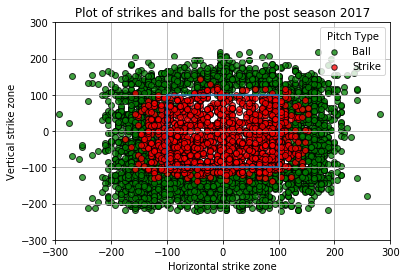

In [5]:
# CHART VALUES
# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b = balls["Pitch_X"]
y_axis_b = balls["Pitch_Y"]
x_axis_s = strikes["Pitch_X"]
y_axis_s = strikes["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b, y_axis_b, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s, y_axis_s, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls.png", bbox_inches="tight")

In [6]:
# Show plot
plt.show()

In [7]:
# list of each umpire
umpire_pitch_count = pitch_data_df['Umpire'].value_counts()
umpire_pitch_count

Ted Barrett           383
Chris Guccione        308
Jim Wolf              258
Chad Fairchild        254
Kerwin Danley         232
James Hoye            172
Jerry Layne           169
Mark Carlson          162
Gary Cederstrom       161
Hunter Wendelstedt    155
Mike Winters          154
Adrian Johnson        148
Cory Blaser           147
Tim Timmons           146
Brian Gorman          143
Tom Hallion           141
Joe West              139
Dan Bellino           139
Mike Muchlinski       138
Angel Hernandez       138
Alan Porter           136
Chris Conroy          136
Scott Barry           134
Vic Carapazza         132
Greg Gibson           130
Gerry Davis           127
Jeff Nelson           112
Lance Barksdale        94
Name: Umpire, dtype: int64

In [8]:
# split out the top 4 umpires for comparason
# separate out balls and strikes

# Ted Barrett
strikes_tb = strikes.loc[pitch_data_df["Umpire"] == "Ted Barrett"]
# strikes_tb.head()
balls_tb = balls.loc[pitch_data_df["Umpire"] == "Ted Barrett"]
# balls_tb.head()

# Chris Guccione
strikes_cg = strikes.loc[pitch_data_df["Umpire"] == "Chris Guccione"]
balls_cg = balls.loc[pitch_data_df["Umpire"] == "Chris Guccione"]

# Jim Wolf
strikes_jw = strikes.loc[pitch_data_df["Umpire"] == "Jim Wolf"]
balls_jw = balls.loc[pitch_data_df["Umpire"] == "Jim Wolf"]

# Chad Fairchild
strikes_cf = strikes.loc[pitch_data_df["Umpire"] == "Chad Fairchild"]
balls_cf = balls.loc[pitch_data_df["Umpire"] == "Chad Fairchild "]



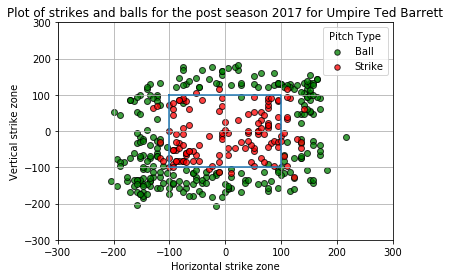

In [9]:
# Ted Barrett

# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b_tb = balls_tb["Pitch_X"]
y_axis_b_tb = balls_tb["Pitch_Y"]
x_axis_s_tb = strikes_tb["Pitch_X"]
y_axis_s_tb = strikes_tb["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b_tb, y_axis_b_tb, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s_tb, y_axis_s_tb, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017 for Umpire Ted Barrett")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls_Ted_Barrett.png", bbox_inches="tight")

# Show plot
plt.show()

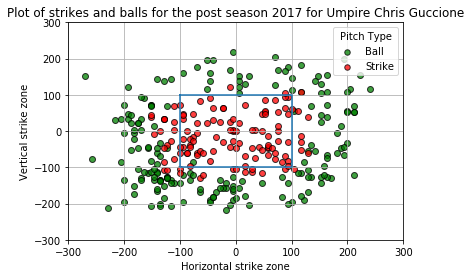

In [10]:
# Chris Guccione

# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b_cg = balls_cg["Pitch_X"]
y_axis_b_cg = balls_cg["Pitch_Y"]
x_axis_s_cg = strikes_cg["Pitch_X"]
y_axis_s_cg = strikes_cg["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b_cg, y_axis_b_cg, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s_cg, y_axis_s_cg, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017 for Umpire Chris Guccione")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls_Chris_Guccione.png", bbox_inches="tight")

# Show plot
plt.show()

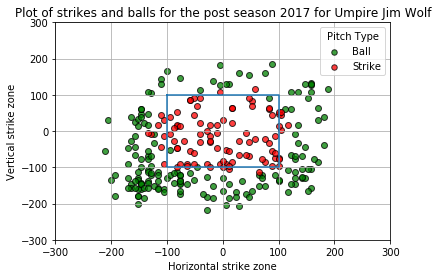

In [11]:
# Jim Wolf

# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b_jw = balls_jw["Pitch_X"]
y_axis_b_jw = balls_jw["Pitch_Y"]
x_axis_s_jw = strikes_jw["Pitch_X"]
y_axis_s_jw = strikes_jw["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b_jw, y_axis_b_jw, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s_jw, y_axis_s_jw, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017 for Umpire Jim Wolf")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls_Jim_Wolf.png", bbox_inches="tight")

# Show plot
plt.show()

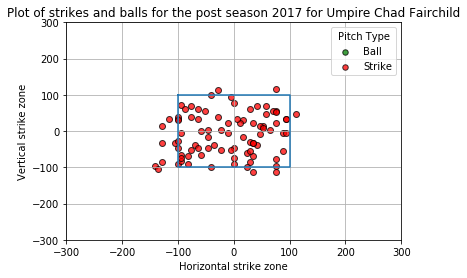

In [12]:
# Chad Fairchild

# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_b_cf = balls_cf["Pitch_X"]
y_axis_b_cf = balls_cf["Pitch_Y"]
x_axis_s_cf = strikes_cf["Pitch_X"]
y_axis_s_cf = strikes_cf["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_b_cf, y_axis_b_cf, marker="o", facecolors="green",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_s_cf, y_axis_s_cf, marker="o", facecolors="red",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of strikes and balls for the post season 2017 for Umpire Chad Fairchild")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Ball", "Strike"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Strikes-Balls_Chad_Fairchild.png", bbox_inches="tight")

# Show plot
plt.show()

In [13]:
# list of each umpires strikes
umpire_strikes = strikes['Umpire'].value_counts()
umpire_strikes

Ted Barrett           129
Chris Guccione        123
Jim Wolf               93
Chad Fairchild         87
Kerwin Danley          83
James Hoye             64
Mark Carlson           56
Jerry Layne            56
Hunter Wendelstedt     55
Tim Timmons            53
Joe West               52
Adrian Johnson         52
Angel Hernandez        51
Greg Gibson            50
Mike Winters           49
Chris Conroy           48
Dan Bellino            48
Gerry Davis            47
Brian Gorman           47
Cory Blaser            47
Vic Carapazza          46
Alan Porter            45
Scott Barry            44
Jeff Nelson            41
Gary Cederstrom        40
Mike Muchlinski        39
Tom Hallion            36
Lance Barksdale        31
Name: Umpire, dtype: int64

In [14]:
umpire_strikes.count()

28

In [15]:
# list of each umpires balls
umpire_balls = balls['Umpire'].value_counts()
umpire_balls

Ted Barrett           254
Chris Guccione        185
Chad Fairchild        167
Jim Wolf              165
Kerwin Danley         149
Gary Cederstrom       121
Jerry Layne           113
James Hoye            108
Mark Carlson          106
Tom Hallion           105
Mike Winters          105
Cory Blaser           100
Hunter Wendelstedt    100
Mike Muchlinski        99
Adrian Johnson         96
Brian Gorman           96
Tim Timmons            93
Dan Bellino            91
Alan Porter            91
Scott Barry            90
Chris Conroy           88
Joe West               87
Angel Hernandez        87
Vic Carapazza          86
Gerry Davis            80
Greg Gibson            80
Jeff Nelson            71
Lance Barksdale        63
Name: Umpire, dtype: int64

In [16]:
umpire_balls.count()

28

In [17]:
umpire_pitch_count.count()

28

In [18]:
# make some headders
umpire_pitch_count = umpire_pitch_count.reset_index()
umpire_pitch_count.columns = ['Umpire', 'total_calls']
# umpire_pitch_count

umpire_balls = umpire_balls.reset_index()
umpire_balls.columns = ['Umpire', 'Balls']
# umpire_balls

umpire_strikes = umpire_strikes.reset_index()
umpire_strikes.columns = ['Umpire', 'Strikes']
# umpire_strikes



In [19]:
# merge the total calls, balls, and strikes together

umpire_merge_table_balls = pd.merge(umpire_pitch_count, umpire_balls, on="Umpire")
umpire_merge_table_balls

umpire_bs = pd.merge(umpire_merge_table_balls, umpire_strikes, on="Umpire")
umpire_bs

,Umpire,total_calls,Balls,Strikes
0,Ted Barrett,383,254,129
1,Chris Guccione,308,185,123
2,Jim Wolf,258,165,93
3,Chad Fairchild,254,167,87
4,Kerwin Danley,232,149,83
5,James Hoye,172,108,64
6,Jerry Layne,169,113,56
7,Mark Carlson,162,106,56
8,Gary Cederstrom,161,121,40
9,Hunter Wendelstedt,155,100,55


In [20]:
# find the percentage of balls and strikes
umpire_bs_Percentageb = round(umpire_bs["Balls"]/umpire_bs["total_calls"],2)
umpire_bs_Percentages = round(umpire_bs["Strikes"]/umpire_bs["total_calls"],2)
umpire_bs["Balls_Percentage"] = umpire_bs_Percentageb
umpire_bs["Strikes_Percentage"] = umpire_bs_Percentages
umpire_bs.head(3)


,Umpire,total_calls,Balls,Strikes,Balls_Percentage,Strikes_Percentage
0,Ted Barrett,383,254,129,0.66,0.34
1,Chris Guccione,308,185,123,0.60,0.40
2,Jim Wolf,258,165,93,0.64,0.36


In [27]:
# pull out just the umpire, balls% and strikes% for stacked chart
# umpire_bs_only

umpire_bs_only = pd.DataFrame(umpire_bs, columns=[
                        "Umpire", "Balls_Percentage", "Strikes_Percentage"])

umpire_bs_only
umpire_bs_only = umpire_bs_only.set_index("Umpire")
# gender_df_sum.index.name = None
umpire_bs_only_sort = umpire_bs_only.sort_values("Balls_Percentage", ascending=False)
umpire_bs_only_sort.head(10)



,Balls_Percentage,Strikes_Percentage
Umpire,,
Gary Cederstrom,0.75,0.25
Tom Hallion,0.74,0.26
Mike Muchlinski,0.72,0.28
Cory Blaser,0.68,0.32
Mike Winters,0.68,0.32
Brian Gorman,0.67,0.33
Scott Barry,0.67,0.33
Alan Porter,0.67,0.33
Lance Barksdale,0.67,0.33


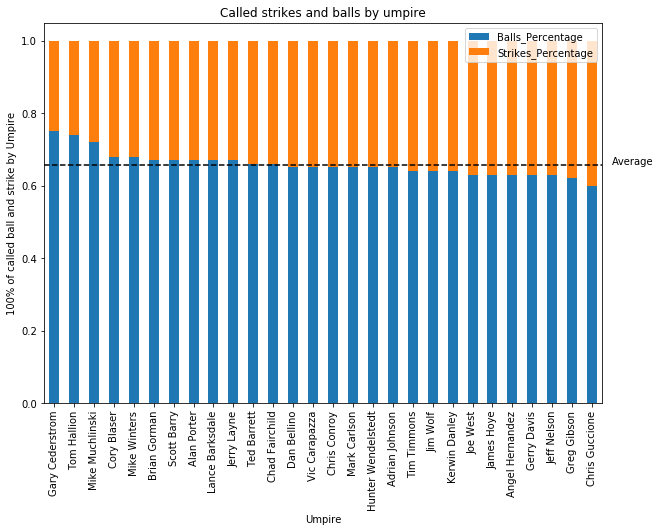

In [28]:
# Bar chart of strikes and balls by ump
umpire_bs_only_sort.loc[:,['Balls_Percentage','Strikes_Percentage']].plot.bar(stacked=True, figsize=(10,7))

plt.ylabel('100% of called ball and strike by Umpire')
plt.title('Called strikes and balls by umpire')
plt.axhline(0.6582, color="k", linestyle="--", label='Average')
plt.text(28, 0.6582, "Average")

# save the file
plt.savefig("Images/Percentage_called_ball_and_strike_by_Umpire.png", bbox_inches="tight")

plt.show()

In [23]:
# pitch_data_df.head()


strikes.head()
# balls.head()

,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0
5,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,-88,65,L,R,FA,90.0
8,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,0,-104,L,R,SL,78.0
9,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-47,100,R,R,FA,95.0
11,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-123,0,R,R,FA,95.0


In [24]:
# missed calls


# find the missed calls of balls and strikes
# strikes['Missed'] = strikes["1"].where(strikes['Pitch_X'] > 100 or strikes['Pitch_X'] < -100, strikes["0"])

strikes['Missed_Call_Strike'] = np.where((strikes['Pitch_X']< -100) | (strikes['Pitch_X']> 100) | (strikes['Pitch_Y']< -100) | (strikes['Pitch_Y']> 100), 
                                         'yes', 'no')
# strikes.head()

balls['Missed_Call_Ball'] = np.where((balls['Pitch_X']<= 100) & (balls['Pitch_X']>= -100) & 
                                (balls['Pitch_Y']<= 100) & (balls['Pitch_Y']>= -100), 'yes', 'no')
# balls.head(3)
strikes.head()


C:\Users\DAbootcamp1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\DAbootcamp1\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,Umpire,Game_ID,Home/Away,Called Ball/Strike,Pitch_X,Pitch_Y,Pitcher_Hand,Batter_Hand,Pitch_Type,Pitch_Speed,Missed_Call_Strike
1,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,82,-21,L,R,FA,89.0,no
5,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,-88,65,L,R,FA,90.0,no
8,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Away,Strike,0,-104,L,R,SL,78.0,yes
9,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-47,100,R,R,FA,95.0,no
11,James Hoye,000023f8-e153-4dcd-9ba0-627ecc9f162e,Home,Strike,-123,0,R,R,FA,95.0,yes


In [25]:
# remove the good calls
strikes_bad = strikes.loc[strikes["Missed_Call_Strike"] == "yes", [
    "Umpire", "Pitch_X", "Pitch_Y", "Missed_Call_Strike"]]
# strikes_bad.head()

balls_bad = balls.loc[balls["Missed_Call_Ball"] == "yes", [
    "Umpire", "Pitch_X", "Pitch_Y", "Missed_Call_Ball"]]
balls_bad.head()


,Umpire,Pitch_X,Pitch_Y,Missed_Call_Ball
120,James Hoye,100,69,yes
171,James Hoye,82,78,yes
182,Tom Hallion,100,-47,yes
212,Tom Hallion,-35,95,yes
331,Kerwin Danley,82,-95,yes


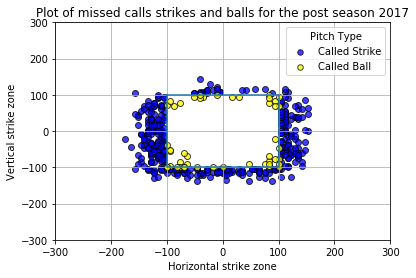

In [26]:
# plot the missed calls, balls, and strikes together
# strikes_bad
# balls_bad

# Chart will be from -300 to 300 for both X and Y
plt.ylim(-300,300)
plt.xlim(-300,300)

# Build the scatter plots for the strikes and balls

x_axis_strikes_bad = strikes_bad["Pitch_X"]
y_axis_strikes_bad = strikes_bad["Pitch_Y"]
x_axis_balls_bad = balls_bad["Pitch_X"]
y_axis_balls_bad = balls_bad["Pitch_Y"]

# set the colors
# temp_plot = plt.scatter(x_axisu, y_axisu, marker="o", facecolors="lightcoral",edgecolors="black", s=10*dcu, alpha=0.75)
temp_plot = plt.scatter(x_axis_strikes_bad, y_axis_strikes_bad, marker="o", facecolors="blue",edgecolors="black", alpha=0.75)
temp_plot = plt.scatter(x_axis_balls_bad, y_axis_balls_bad, marker="o", facecolors="yellow",edgecolors="black", alpha=0.75)

plt.grid()

# add the titleing (not the the \n is like a ^p for the text)
plt.title("Plot of missed calls strikes and balls for the post season 2017")
plt.xlabel("Horizontal strike zone")
plt.ylabel("Vertical strike zone")
# We might want to put a note to the side so this is a placeholder
# plt.text(42, 35, "Note: \nThe note goes here.")

# create and size the ledgend
lgnd= plt.legend(["Called Strike", "Called Ball"], loc=1, markerscale = .5, title="Pitch Type")
# this part adds the pitch types, and makes all the dots in the legond the same size
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]

# adds a box to show the strike zone
x = [-100, -100, 100, 100, -100]
y = [100, -100, -100, 100, 100]
plt.plot(x, y)




# save the file
plt.savefig("Images/Missed_Calls_Strikes-Balls.png", bbox_inches="tight")

# Show plot
plt.show()

